<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B4%5D_ER_cHB_XgBoost_KFold_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Feed Effect on Biocrude ER Data ML 111020.csv')
Oil_ER = data['Bio-crude Oil ER']
Features = data.drop('Bio-crude Oil ER', axis = 1)

# Success
print ("Bio-crude ER dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude ER dataset has 130 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,52.4
30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,82.7
60,10.0,34.0,0.0,0.0,29.3,0.0,6.8,65.5
90,3.5,16.9,17.4,8.9,0.0,35.4,4.5,60.5
120,13.9,46.9,0.0,0.0,28.0,0.0,3.5,60.2


In [2]:
# TODO: Minimum price of the data
minimum_Oil_ER = np.min(Oil_ER)

# TODO: Maximum price of the data
maximum_Oil_ER = np.max(Oil_ER)

# TODO: Mean price of the data
mean_Oil_ER = np.mean(Oil_ER)

# TODO: Median price of the data
median_Oil_ER = np.median(Oil_ER)

# TODO: Standard deviation of prices of the data
std_Oil_ER = np.std(Oil_ER)

# Show the calculated statistics

print("Statistics for bio-crude ER dataset:\n")
print("Minimum bio-crude oil ER:{: .2f} %".format(minimum_Oil_ER))
print("Maximum bio-crude oil ER:{: .2f} %".format(maximum_Oil_ER))
print("Mean bio-crude oil ER:{: .2f} %".format(mean_Oil_ER))
print("Median bio-crude oil ER:{: .2f} %".format(median_Oil_ER))
print("Standard deviation of bio-crude oil ER:{: .2f} %".format(std_Oil_ER))

data.describe()

Statistics for bio-crude ER dataset:

Minimum bio-crude oil ER: 2.50 %
Maximum bio-crude oil ER: 92.00 %
Mean bio-crude oil ER: 43.97 %
Median bio-crude oil ER: 45.20 %
Standard deviation of bio-crude oil ER: 19.91 %


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,129.000000,130.000000
mean,10.077692,25.000000,18.858462,8.073846,19.490000,8.094615,6.902326,43.970769
std,19.042308,26.912396,27.227704,16.668829,26.616579,14.239008,11.179295,19.988467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000
50%,1.700000,18.350000,0.000000,0.000000,9.900000,0.000000,2.500000,45.200000
75%,12.175000,44.550000,37.325000,7.975000,27.600000,13.975000,7.200000,58.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,92.000000


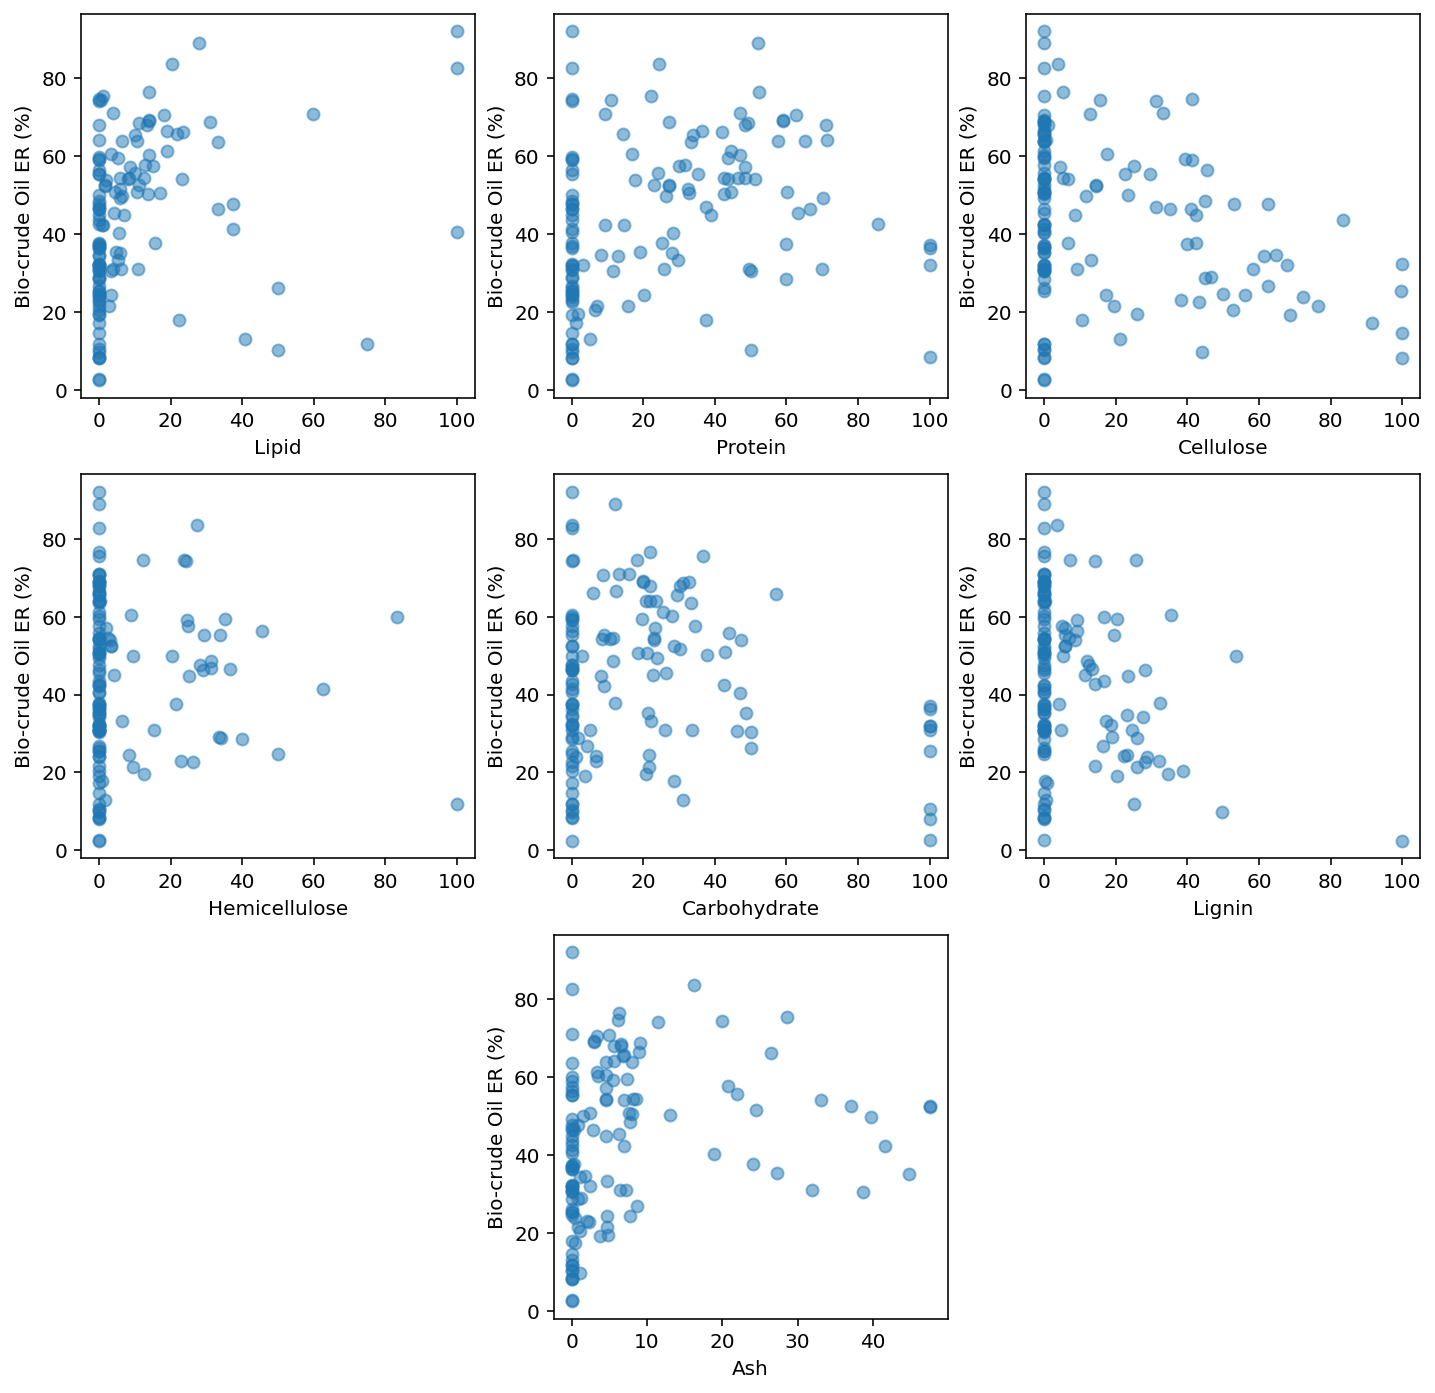

In [3]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Protein'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Ash'],data['Bio-crude Oil ER'],alpha = 0.5)
plt.show()

(array([2., 0., 0., 3., 3., 3., 1., 0., 2., 2., 3., 3., 5., 2., 3., 7., 5.,
        3., 4., 5., 0., 3., 4., 3., 4., 3., 6., 5., 6., 3., 4., 3., 4., 0.,
        4., 4., 3., 3., 3., 0., 4., 1., 0., 0., 1., 1., 0., 0., 1., 1.]),
 array([ 2.5 ,  4.29,  6.08,  7.87,  9.66, 11.45, 13.24, 15.03, 16.82,
        18.61, 20.4 , 22.19, 23.98, 25.77, 27.56, 29.35, 31.14, 32.93,
        34.72, 36.51, 38.3 , 40.09, 41.88, 43.67, 45.46, 47.25, 49.04,
        50.83, 52.62, 54.41, 56.2 , 57.99, 59.78, 61.57, 63.36, 65.15,
        66.94, 68.73, 70.52, 72.31, 74.1 , 75.89, 77.68, 79.47, 81.26,
        83.05, 84.84, 86.63, 88.42, 90.21, 92.  ]),
 <a list of 50 Patch objects>)

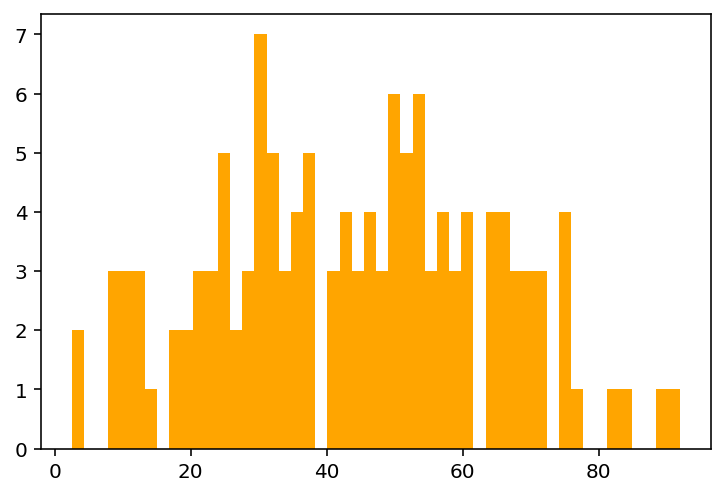

In [4]:
plt.hist(data['Bio-crude Oil ER'],bins=50,color='orange')

(array([66.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

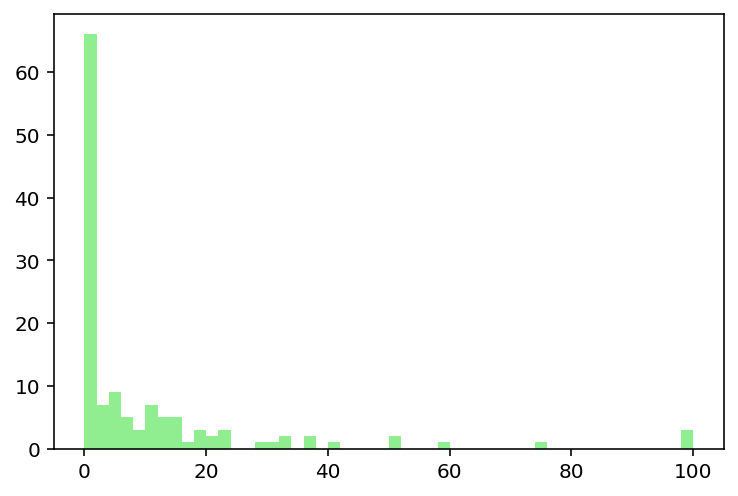

In [5]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


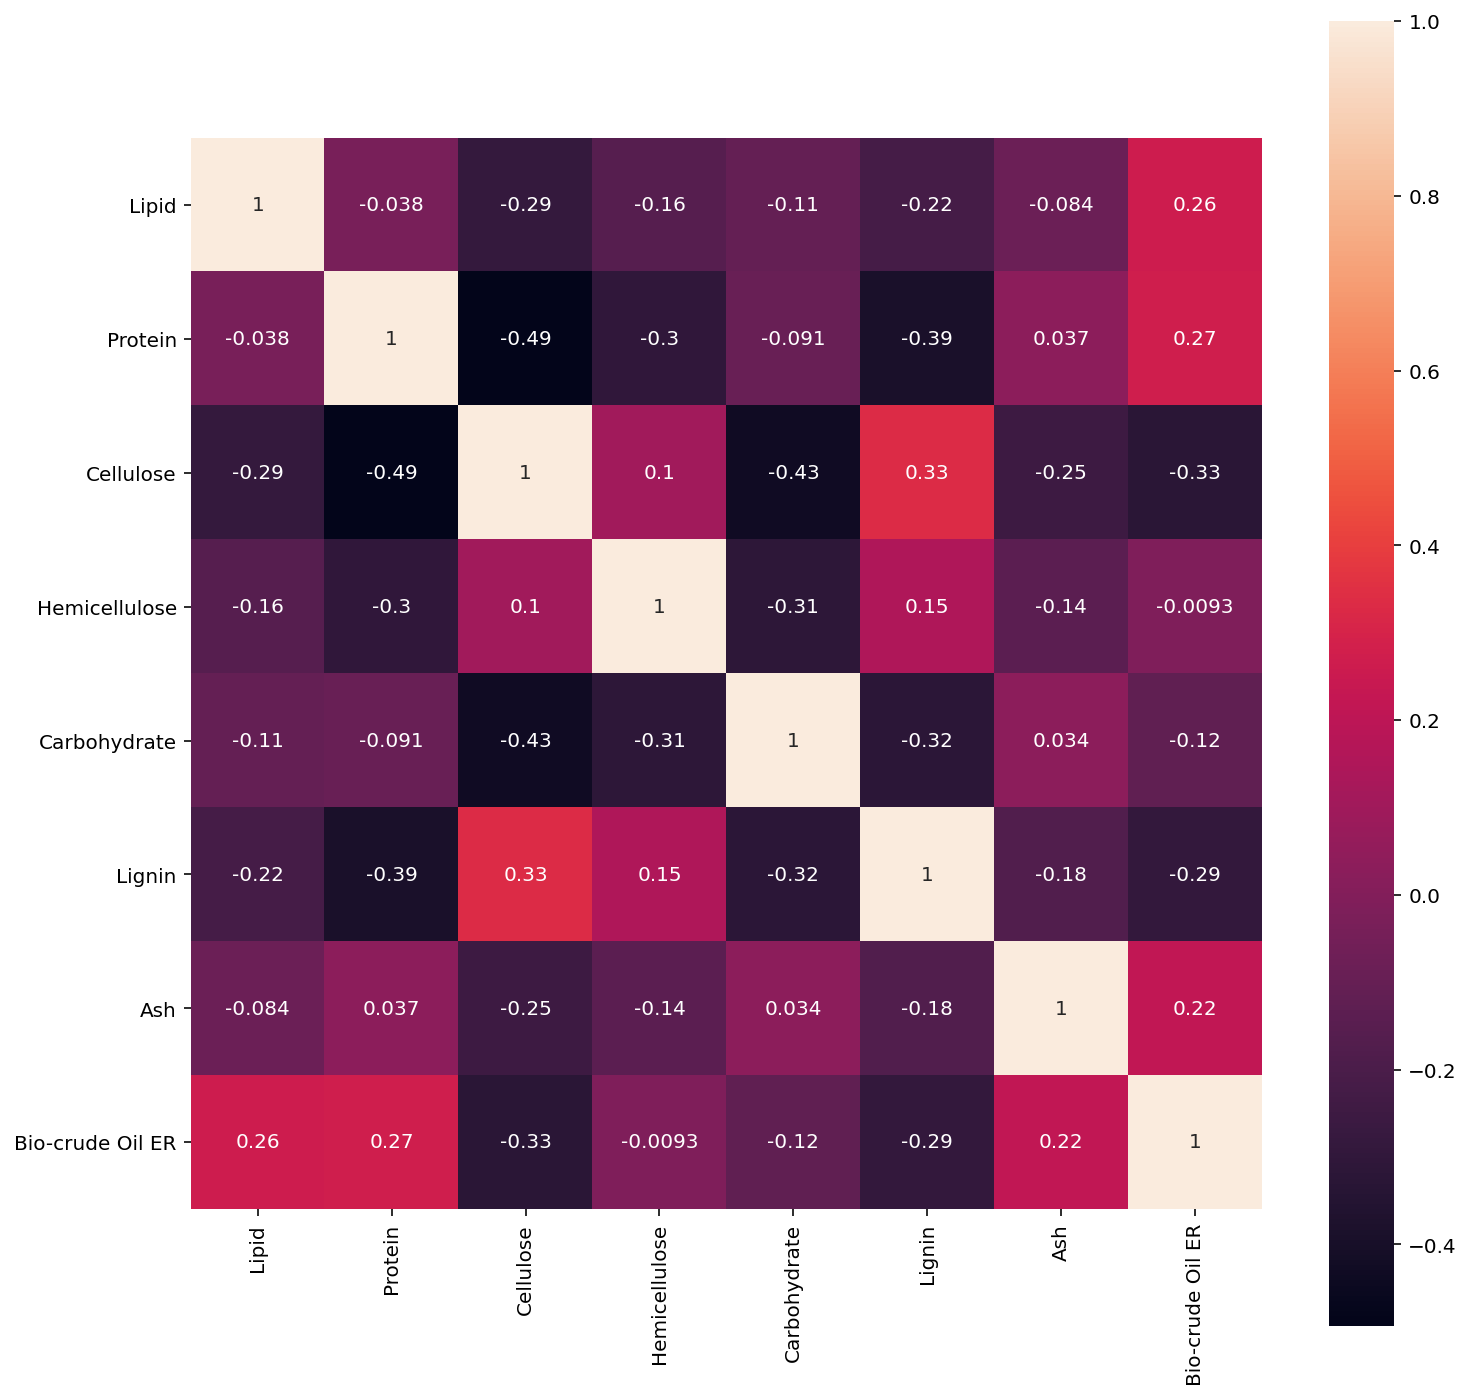

In [6]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [7]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [16]:
for i in range(0,201,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = i)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 9 folds.  
  kf =KFold(n_splits=9, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0
Mean value of R2 of training set 0.8740711804145391
Standard deviation of R2 of training set 0.01759024316570579
Mean value of R2 of test set 0.062376607421099343
Standard deviation of R2 of test set 0.3433722007478025
1
Mean value of R2 of training set 0.876117537302647
Standard deviation of R2 of training set 0.011450001140743396
Mean value of R2 of test set 0.18701283072083907
Standard deviation of R2 of test set 0.2681517476179832
2
Mean value of R2 of training set 0.8765829846252832
Standard deviation of R2 of training set 0.010407808714462305
Mean value of R2 of test set 0.21612391065579384
Standard deviation of R2 of test set 0.20358008364702979
3
Mean value of R2 of training set 0.8731738954281053
Standard deviation of R2 of training set 0.014913970275113455
Mean value of R2 of test set 0.128032521490677
Standard deviation of R2 of test set 0.21082102841190148
4
Mean value of R2 of training set 0.8745812316850572
Standard deviation of R2 of training set 0.012574020114613503
M

In [17]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 4.813247147447656
Standard deviation of MAE of training set 0.4460315032158537
Mean value of MAE of test set 12.890433944716598
Standard deviation of MAE of test set 1.0808813699299493

Mean value of RMSE of training set 6.75503125901207
Standard deviation of RMSE of training set 0.5072787036227117
Mean value of RMSE of test set 15.995133616858885
Standard deviation of RMSE of test set 1.2398729177743029

Mean value of R2 of training set 0.8846695392938906
Standard deviation of R2 of training set 0.011030260052926878
Mean value of R2 of test set 0.337187084177254
Standard deviation of R2 of test set 0.03604021574574923

Mean value of MRE of training set 0.10937472630661982
Standard deviation of MRE of training set 0.00888032046192604
Mean value of MRE of test set 0.2929072221250709
Standard deviation of MRE of test set 0.014084909380232801


Text(0.5, 1.0, 'y_pred vs. y_true')

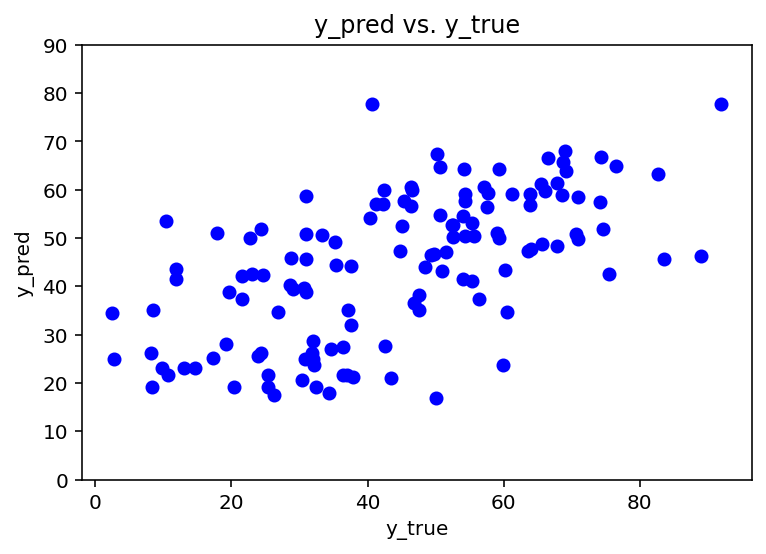

In [20]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [21]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_XGBoost.csv', index = False, header=True)

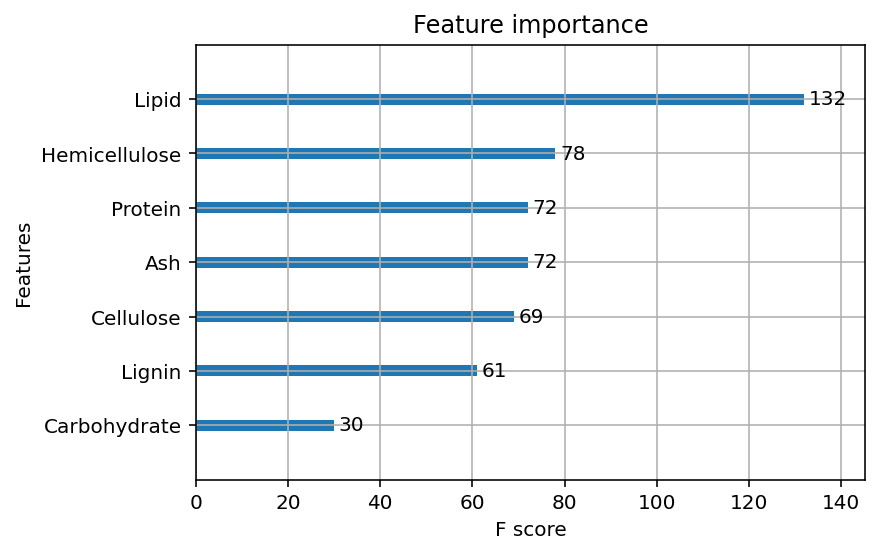

In [22]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 500, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'n_estimators': np.linspace(10, 110, 11, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'n_estimators': 40}
最佳模型得分: 0.6927361093234188


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    2.4s finished


In [24]:
# n_estimators 参数的最佳取值(10, 220, 10)

for i in range(21, 39, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': i, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

21
Mean value of R2 of training set 0.6620976074681765
Standard deviation of R2 of training set 0.013824183137233303
Mean value of R2 of test set 0.26304714726613676
Standard deviation of R2 of test set 0.11925271808595353
22
Mean value of R2 of training set 0.684277877216759
Standard deviation of R2 of training set 0.013101616469574548
Mean value of R2 of test set 0.2816680675483144
Standard deviation of R2 of test set 0.10829958803195744
23
Mean value of R2 of training set 0.7081671712139626
Standard deviation of R2 of training set 0.014186614322479566
Mean value of R2 of test set 0.28858071342881475
Standard deviation of R2 of test set 0.10623776743975645
24
Mean value of R2 of training set 0.7270451736545
Standard deviation of R2 of training set 0.013090972831985062
Mean value of R2 of test set 0.3002462906476805
Standard deviation of R2 of test set 0.10246265362207126
25
Mean value of R2 of training set 0.7435740041528713
Standard deviation of R2 of training set 0.0126518748343142

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'max_depth': np.linspace(1, 10, 10, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'max_depth': 5}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [25]:
# max_depth 参数的最佳取值(1, 10, 10)

for i in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': i, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.39968151445050454
Standard deviation of R2 of training set 0.029604187154875176
Mean value of R2 of test set 0.2812147480598909
Standard deviation of R2 of test set 0.12144250777079382
2
Mean value of R2 of training set 0.5808489504935631
Standard deviation of R2 of training set 0.018070490167775746
Mean value of R2 of test set 0.3529228094473946
Standard deviation of R2 of test set 0.08532717626775739
3
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
4
Mean value of R2 of training set 0.7572066644299672
Standard deviation of R2 of training set 0.009544971868331623
Mean value of R2 of test set 0.3504251639705216
Standard deviation of R2 of test set 0.0899113795530693
5
Mean value of R2 of training set 0.7897927007129453
Standard deviation of R2 of training set 0.015975936179359353
M

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'min_child_weight': np.linspace(1, 10, 10, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'min_child_weight': 1}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [26]:
# min_child_weight 参数的最佳取值(1, 10, 10)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': i/10,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.1
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.2
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.3
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.4
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.0097065219761

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'gamma': np.linspace(0, 0.1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'gamma': 0.0}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [27]:
# gamma 参数的最佳取值(0, 0.1, 11)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': i/100, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.01
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.02
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.03
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.00970652197615348
Mean value of R2 of test set 0.3811946169359783
Standard deviation of R2 of test set 0.09295690958727353
0.04
Mean value of R2 of training set 0.7033169705275868
Standard deviation of R2 of training set 0.009706521

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'subsample': np.linspace(0, 1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'subsample': 0.6000000000000001}
最佳模型得分: 0.7022748805402046


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [30]:
# subsample 参数的最佳取值(0, 1, 11)

for i in range(601,620,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': i/1000, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/1000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.601
Mean value of R2 of training set 0.7025013277507725
Standard deviation of R2 of training set 0.011121243195217758
Mean value of R2 of test set 0.38404947473463413
Standard deviation of R2 of test set 0.09332944300268319
0.602
Mean value of R2 of training set 0.7005639326627106
Standard deviation of R2 of training set 0.01055868193341189
Mean value of R2 of test set 0.3713515601347067
Standard deviation of R2 of test set 0.0768165147098115
0.603
Mean value of R2 of training set 0.6984928843708748
Standard deviation of R2 of training set 0.013294688512912468
Mean value of R2 of test set 0.36837132659874394
Standard deviation of R2 of test set 0.09366457323387979
0.604
Mean value of R2 of training set 0.6964223803399373
Standard deviation of R2 of training set 0.009331832277205108
Mean value of R2 of test set 0.3718994383172278
Standard deviation of R2 of test set 0.09925795542230087
0.605
Mean value of R2 of training set 0.7010226188595519
Standard deviation of R2 of training set 0

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'colsample_bytree': np.linspace(0, 1, 11)[1:]}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'colsample_bytree': 1.0}
最佳模型得分: 0.7022748805402046


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [31]:
# colsample_bytree 参数的最佳取值(0, 1, 11)

for i in range(0,101,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': i/100, 'colsample_bylevel': 1, 'subsample': 0.611, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.5051100112424464
Standard deviation of R2 of training set 0.0070194472419657155
Mean value of R2 of test set 0.2468612332642443
Standard deviation of R2 of test set 0.0749240831150049
0.01
Mean value of R2 of training set 0.5051100112424464
Standard deviation of R2 of training set 0.0070194472419657155
Mean value of R2 of test set 0.2468612332642443
Standard deviation of R2 of test set 0.0749240831150049
0.02
Mean value of R2 of training set 0.5051100112424464
Standard deviation of R2 of training set 0.0070194472419657155
Mean value of R2 of test set 0.2468612332642443
Standard deviation of R2 of test set 0.0749240831150049
0.03
Mean value of R2 of training set 0.5051100112424464
Standard deviation of R2 of training set 0.0070194472419657155
Mean value of R2 of test set 0.2468612332642443
Standard deviation of R2 of test set 0.0749240831150049
0.04
Mean value of R2 of training set 0.5051100112424464
Standard deviation of R2 of training set 0.00701

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'reg_lambda': np.linspace(0, 1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_lambda': 0.7000000000000001}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [35]:
# reg_lambda 参数的最佳取值(0, 1, 11)

for i in range(611,629,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.611, 'reg_lambda': i/1000, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/1000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.611
Mean value of R2 of training set 0.7039360957575789
Standard deviation of R2 of training set 0.005108179475341611
Mean value of R2 of test set 0.39663827891119985
Standard deviation of R2 of test set 0.085967683251966
0.612
Mean value of R2 of training set 0.7038999146220453
Standard deviation of R2 of training set 0.005104081860379282
Mean value of R2 of test set 0.3966350036150303
Standard deviation of R2 of test set 0.08596996568341767
0.613
Mean value of R2 of training set 0.7038636879292518
Standard deviation of R2 of training set 0.005099981073357301
Mean value of R2 of test set 0.39663170453543595
Standard deviation of R2 of test set 0.08597233036619956
0.614
Mean value of R2 of training set 0.7044709983539995
Standard deviation of R2 of training set 0.0063015901441483575
Mean value of R2 of test set 0.3949222388952709
Standard deviation of R2 of test set 0.08579517568533129
0.615
Mean value of R2 of training set 0.7034092006232806
Standard deviation of R2 of training set 

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'reg_alpha': np.linspace(0, 0.1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_alpha': 0.0}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.8s finished


In [36]:
# reg_alpha 参数的最佳取值(0, 1, 11)

for i in range(0,100,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.611, 'reg_lambda': 0.619, 'reg_alpha': i/10000,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.7031171184631815
Standard deviation of R2 of training set 0.004702599576990289
Mean value of R2 of test set 0.39870943886405996
Standard deviation of R2 of test set 0.08643413003901924
0.0001
Mean value of R2 of training set 0.7031169130193704
Standard deviation of R2 of training set 0.004702571056348946
Mean value of R2 of test set 0.3987094275001667
Standard deviation of R2 of test set 0.08643413491599802
0.0002
Mean value of R2 of training set 0.7031166769104286
Standard deviation of R2 of training set 0.004702549178823593
Mean value of R2 of test set 0.3987093486459481
Standard deviation of R2 of test set 0.08643415829816814
0.0003
Mean value of R2 of training set 0.7031164555753975
Standard deviation of R2 of training set 0.004702535628462175
Mean value of R2 of test set 0.3987093312034315
Standard deviation of R2 of test set 0.08643413149779552
0.0004
Mean value of R2 of training set 0.7031162266410674
Standard deviation of R2 of training se

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'eta': np.logspace(-2, 0, 10)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'eta': 0.01}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [37]:
# eta 参数的最佳取值(-2, 0, 10)

for i in range(0,10,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': i/100, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.611, 'reg_lambda': 0.619, 'reg_alpha': 0.0000,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.7031171184631815
Standard deviation of R2 of training set 0.004702599576990289
Mean value of R2 of test set 0.39870943886405996
Standard deviation of R2 of test set 0.08643413003901924
0.01
Mean value of R2 of training set 0.7031171184631815
Standard deviation of R2 of training set 0.004702599576990289
Mean value of R2 of test set 0.39870943886405996
Standard deviation of R2 of test set 0.08643413003901924
0.02
Mean value of R2 of training set 0.7031171184631815
Standard deviation of R2 of training set 0.004702599576990289
Mean value of R2 of test set 0.39870943886405996
Standard deviation of R2 of test set 0.08643413003901924
0.03
Mean value of R2 of training set 0.7031171184631815
Standard deviation of R2 of training set 0.004702599576990289
Mean value of R2 of test set 0.39870943886405996
Standard deviation of R2 of test set 0.08643413003901924
0.04
Mean value of R2 of training set 0.7031171184631815
Standard deviation of R2 of training set 0.0

In [38]:
# seed 参数的最佳取值(0, 100, 1)

for i in range(0,101,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.611, 'reg_lambda': 0.619, 'reg_alpha': 0.0000,
                'seed': i}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0
Mean value of R2 of training set 0.7035859468319887
Standard deviation of R2 of training set 0.02760564169656058
Mean value of R2 of test set 0.3140223553141679
Standard deviation of R2 of test set 0.09401334112026143
1
Mean value of R2 of training set 0.7023479695947885
Standard deviation of R2 of training set 0.018274501138159514
Mean value of R2 of test set 0.30617641677781676
Standard deviation of R2 of test set 0.08712392024610266
2
Mean value of R2 of training set 0.7029865979568397
Standard deviation of R2 of training set 0.015703605436405085
Mean value of R2 of test set 0.31863338302753635
Standard deviation of R2 of test set 0.09252723103706606
3
Mean value of R2 of training set 0.7144000347174089
Standard deviation of R2 of training set 0.017704547580432124
Mean value of R2 of test set 0.33881281303242883
Standard deviation of R2 of test set 0.07253860784206008
4
Mean value of R2 of training set 0.6941635574127516
Standard deviation of R2 of training set 0.02833032094974460

[05:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Optimal model has RMSE of training set: 4.794023577965594
Optimal model has RMSE of test set: 7.632683974683252
Optimal model has R2 score of training set 0.91 on test data.
Optimal model has R2 score of test set 0.85 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 34.91 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 39.48 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 31.81 wt%


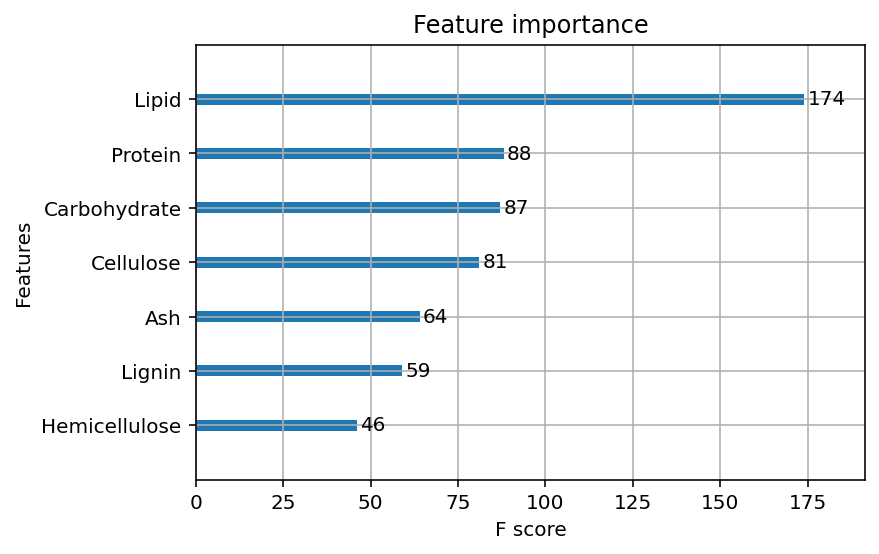

In [ ]:
# No use now.
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)
  
other_params = {'eta': 0.01, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

model = XGBRegressor(**other_params,silent = True)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [{'Lipid':21.9, 'Protein':17.8, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':58.9, 'Lignin':0, 'Ash':1.1}, # Model Food Waste
                              {'Lipid':19.7, 'Protein':13.5, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':22.9, 'Lignin':0, 'Ash':7.3},  # N.salina
                              {'Lipid':5.5, 'Protein':45.3, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':14.5, 'Lignin':0, 'Ash':10.4}]  # G.sulphuraria

feedstock_composition_data = pd.DataFrame(feedstock_composition_data)

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

In [39]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 29, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.611, 'reg_lambda': 0.619, 'reg_alpha': 0.0000,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 8.83254156353698
Standard deviation of MAE of training set 0.3653876659420814
Mean value of MAE of test set 12.459555825229849
Standard deviation of MAE of test set 1.959144439583757

Mean value of RMSE of training set 10.838865087646136
Standard deviation of RMSE of training set 0.3997409528581
Mean value of RMSE of test set 15.321261214973601
Standard deviation of RMSE of test set 2.4285771838138515

Mean value of R2 of training set 0.7031171184631815
Standard deviation of R2 of training set 0.004702599576990289
Mean value of R2 of test set 0.39870943886405996
Standard deviation of R2 of test set 0.08643413003901924

Mean value of MRE of training set 0.20082820462994463
Standard deviation of MRE of training set 0.005977718894408389
Mean value of MRE of test set 0.2822017119661186
Standard deviation of MRE of test set 0.033840848123408505


In [44]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_XGBoost_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

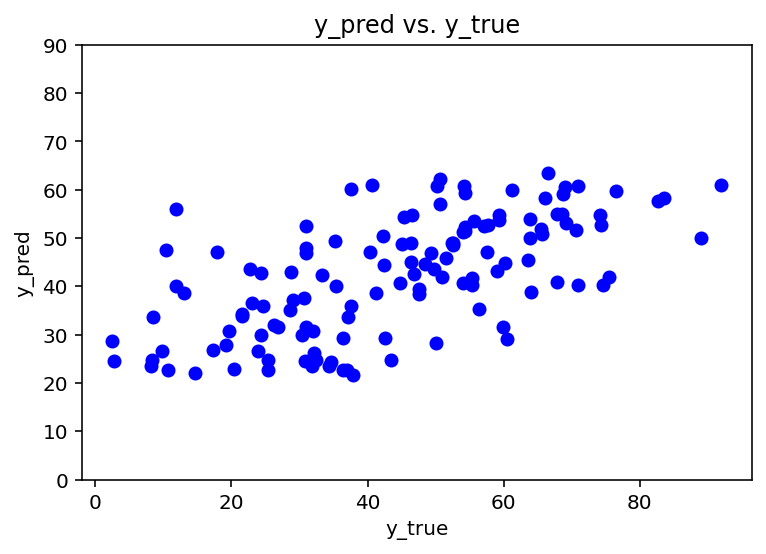

In [42]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

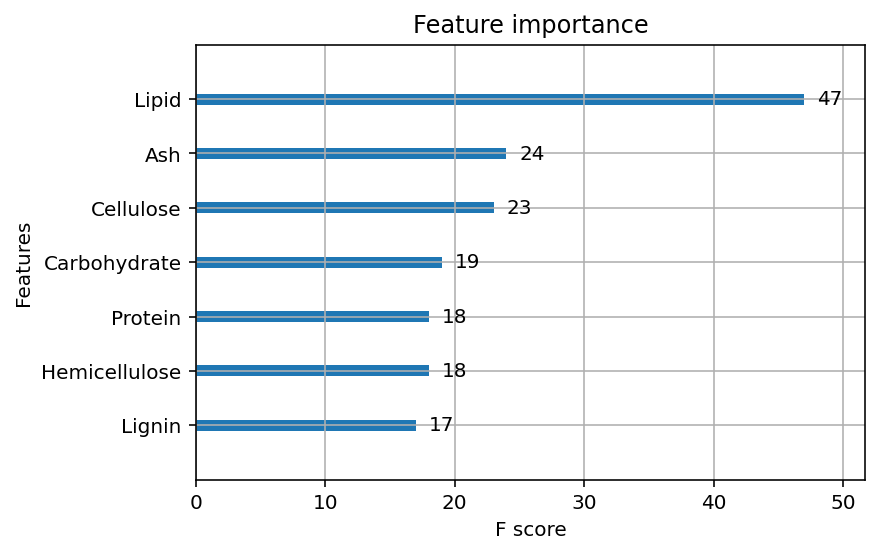

In [43]:
plot_importance(model)
plt.show()